In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Housing.csv")
df.head(100)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6300000,4100,3,2,3,yes,no,no,no,yes,2,no,semi-furnished
96,6300000,9000,3,1,1,yes,no,yes,no,no,1,yes,furnished
97,6300000,6400,3,1,1,yes,yes,yes,no,yes,1,yes,semi-furnished
98,6293000,6600,3,2,3,yes,no,no,no,yes,0,yes,unfurnished


In [233]:
##Preprocessing

In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.drop(['prefarea'], axis=1, inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [8]:
df.isin(['?']).sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [9]:
df=df.drop_duplicates()
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [10]:
df.dropna
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [19]:
scaler = StandardScaler()
df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus']]
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [20]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
5,7500,3,3,1,yes,no,yes,no,yes,2,semi-furnished
6,8580,4,3,4,yes,no,no,no,yes,2,semi-furnished
7,16200,5,3,2,yes,no,no,no,no,0,unfurnished
8,8100,4,1,2,yes,yes,yes,no,yes,2,furnished
9,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished


In [22]:
y.head(10)

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
5    10850000
6    10150000
7    10150000
8     9870000
9     9800000
Name: price, dtype: int64

In [23]:
##Data Analysis

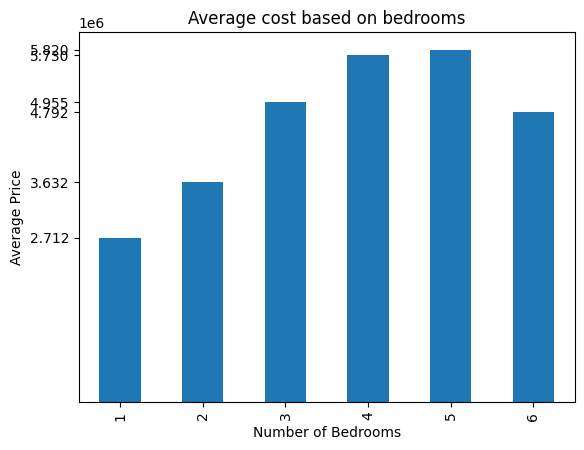

In [27]:
bedroom_means = df.groupby('bedrooms')['price'].mean()
ax = bedroom_means.plot(kind='bar', title='Average cost based on bedrooms')
ax.set_yticks(bedroom_means)

plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')

plt.show()

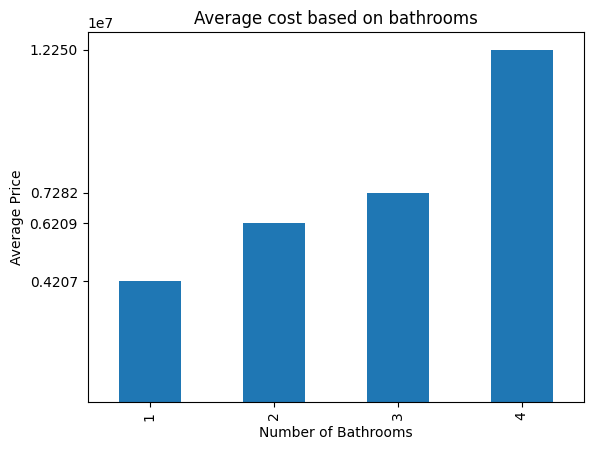

In [40]:


bathroom_means = df.groupby('bathrooms')['price'].mean()
bx = bathroom_means.plot(kind='bar', title='Average cost based on bathrooms')
bx.set_yticks(bathroom_means)

plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')

plt.show()

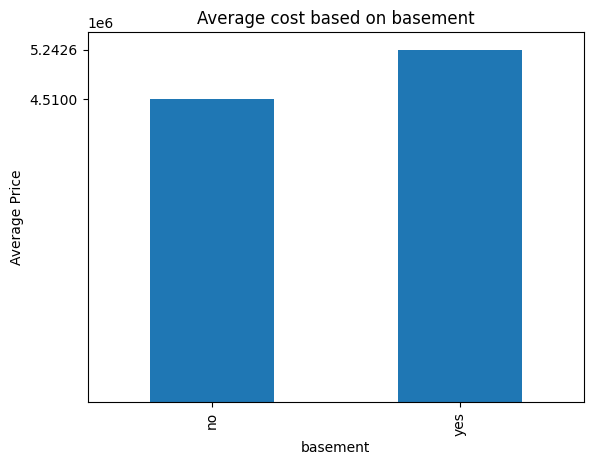

In [41]:
basement_means = df.groupby('basement')['price'].mean()
cx = basement_means.plot(kind='bar', title='Average cost based on basement')
cx.set_yticks(basement_means)

plt.xlabel('basement')
plt.ylabel('Average Price')

plt.show()

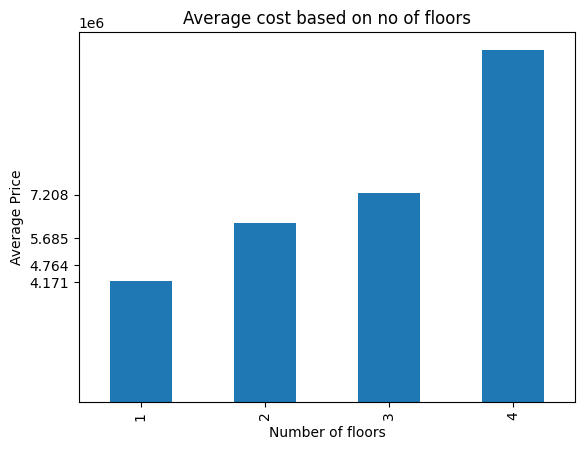

In [42]:
stories_means = df.groupby('stories')['price'].mean()
dx = bedroom_means.plot(kind='bar', title='Average cost based on no of floors')
dx.set_yticks(stories_means)

plt.xlabel('Number of floors')
plt.ylabel('Average Price')

plt.show()

array([[<Axes: title={'center': 'price'}>]], dtype=object)

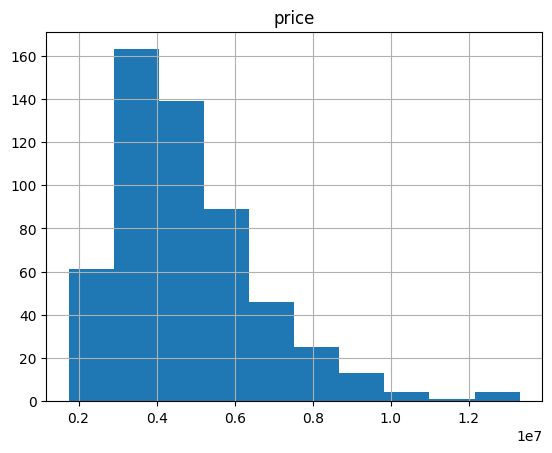

In [44]:
df.hist(column='price')

array([[<Axes: title={'center': 'bedrooms'}>]], dtype=object)

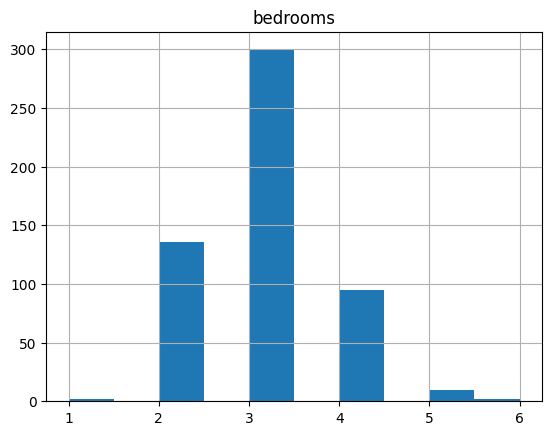

In [47]:
df.hist(column='bedrooms')

array([[<Axes: title={'center': 'area'}>]], dtype=object)

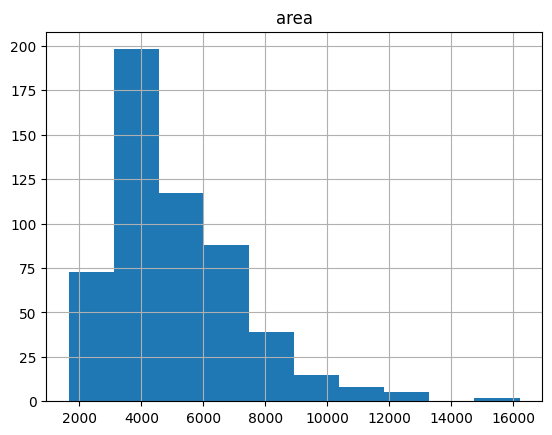

In [48]:
df.hist(column='area')

array([[<Axes: title={'center': 'stories'}>]], dtype=object)

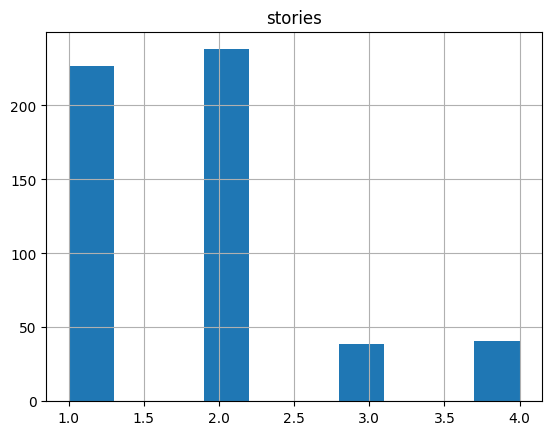

In [49]:
df.hist(column='stories')

<Axes: title={'center': 'no of bedrooms vs no of bathrooms'}, xlabel='bedrooms', ylabel='bathrooms'>

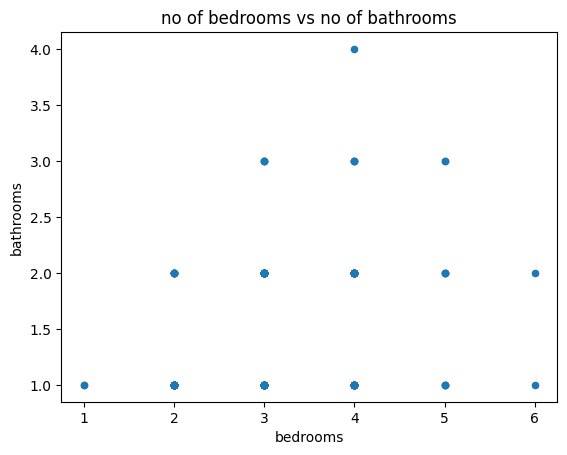

In [45]:
df.plot(x='bedrooms', y='bathrooms', kind='scatter', title='no of bedrooms vs no of bathrooms')

<Axes: title={'center': 'no of bedrooms vs no of stories'}, xlabel='bedrooms', ylabel='stories'>

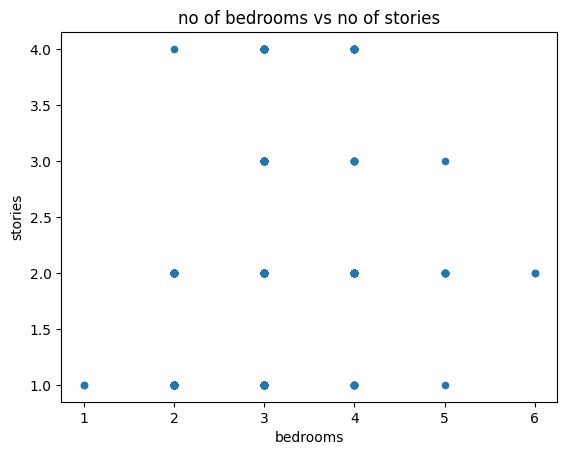

In [46]:
df.plot(x='bedrooms', y='stories', kind='scatter', title='no of bedrooms vs no of stories')

In [50]:
##Machine Learning Algorithms

In [2]:
df=pd.read_csv("breast-cancer-wisconsin-data_data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
X = df.loc[:,['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = df.loc[:,'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
##Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [14]:
y_pred=clf.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M'], dtype=object)

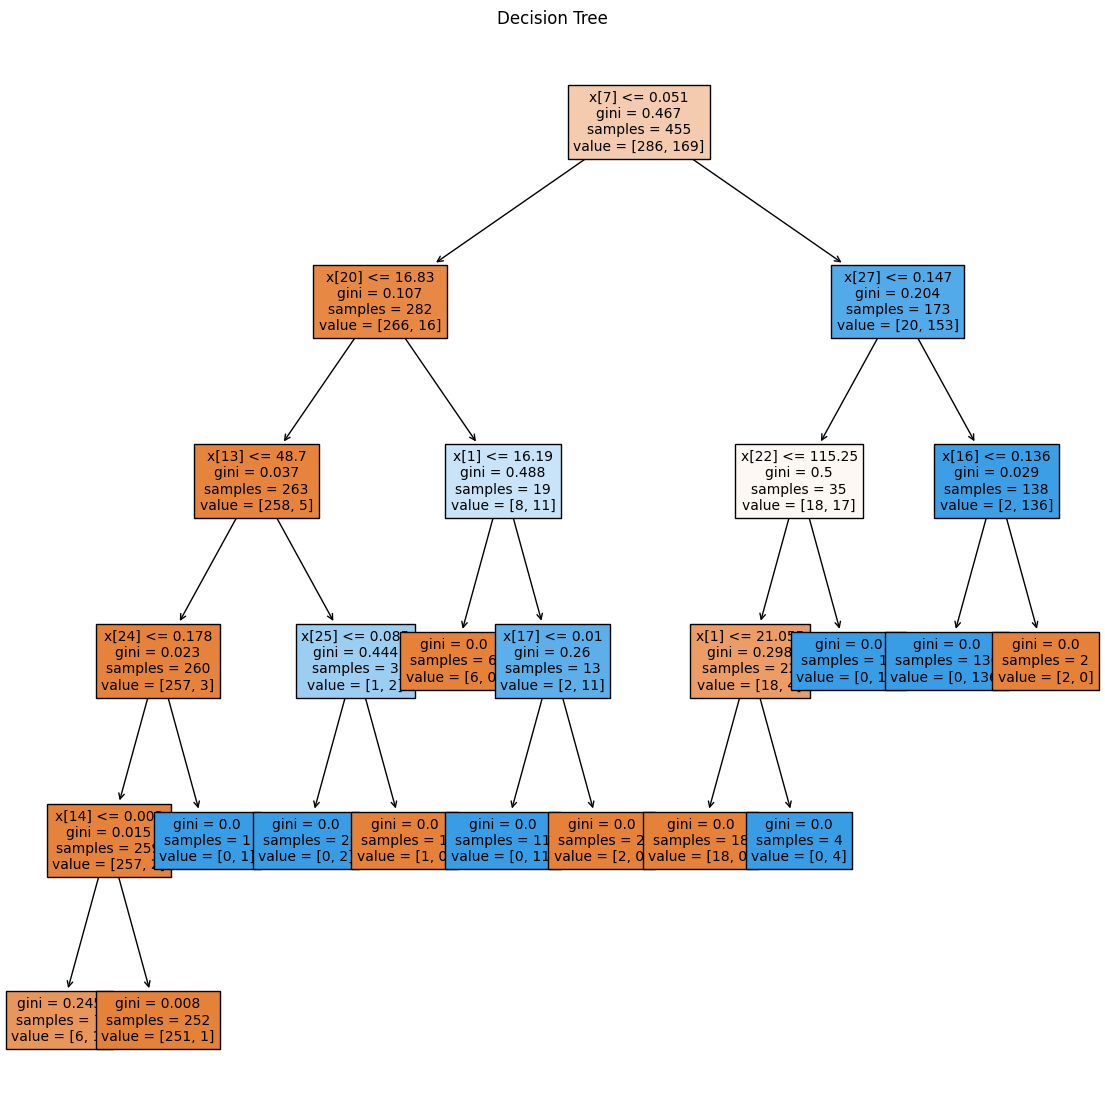

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(clf, fontsize=10, filled=True)
plt.title("Decision Tree")
plt.show()

In [16]:
print("Accuracy: ", clf.score(X_test,y_test)*100, "%")

Accuracy:  94.73684210526315 %


In [17]:
#KNN Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred = knn.predict(X_test)
y_pred

array(['M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype=object)

In [21]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.98%


In [22]:
##Support Vector Machine Classifier

In [23]:
from sklearn.svm import SVC

In [24]:
kernel=['linear', 'rbf', 'poly', 'sigmoid']
for i in kernel:
    model=SVC(kernel=i, C=1.0)
    model.fit(X_train,y_train)
    print('For kernel: ', i)
    print('Accuracy is: ', model.score(X_test,y_test))

For kernel:  linear
Accuracy is:  0.956140350877193
For kernel:  rbf
Accuracy is:  0.9473684210526315
For kernel:  poly
Accuracy is:  0.9473684210526315
For kernel:  sigmoid
Accuracy is:  0.4649122807017544


In [25]:
clf=SVC(kernel='linear', C=1.0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M'], dtype=object)

In [26]:
print("Accuracy is: ", clf.score(X_test, y_test)*100, "%")

Accuracy is:  95.6140350877193 %


In [27]:
##Multilayer Perceptron Classifier

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
clf=MLPClassifier(random_state=1, max_iter=300).fit(X_train,y_train)

In [30]:
y_pred=clf.predict(X_test)
y_pred

array(['M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M'], dtype='<U1')

In [31]:
print("Accuracy is: ", clf.score(X_test,y_test)*100, "%")

Accuracy is:  94.73684210526315 %


In [32]:
##Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred=nb.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype='<U1')

In [36]:
print("Accuracy is: ", nb.score(X_test,y_test)*100, "%")

Accuracy is:  97.36842105263158 %


In [37]:
##Comparison of the Accuracies of the ML Algorithms

In [38]:
names=['Decision Tree', 'KNN', 'Linear SVM', 'Multilayer Perceptron', 'Naive Bayes']
classifiers=[DecisionTreeClassifier(max_depth=5), KNeighborsClassifier(3), SVC(kernel='linear', C=1.0), MLPClassifier(random_state=1, max_iter=300), GaussianNB()]

In [39]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train.values.ravel())
    score=clf.score(X_test, y_test)
    print("Classifier Name: ", name, "Score: ", score)

Classifier Name:  Decision Tree Score:  0.9473684210526315
Classifier Name:  KNN Score:  0.9298245614035088
Classifier Name:  Linear SVM Score:  0.956140350877193
Classifier Name:  Multilayer Perceptron Score:  0.9473684210526315
Classifier Name:  Naive Bayes Score:  0.9736842105263158
